#Basics of Cluster analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #style of all graphs
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('/content/3.01.+Country+clusters.csv')

#Clustering using the location of countries with latitude and longitude

In [7]:
data #latitude and logitude are locations of the country


,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

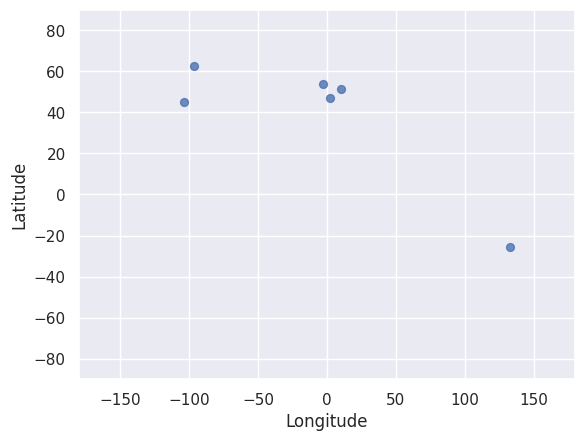

In [8]:
# @title Longitude vs Latitude

data.plot(kind='scatter', x='Longitude', y='Latitude', s=32, alpha=.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show
#plt.gca().spines[['top', 'right',]].set_visible(False) # subsituted by plt.show

In [9]:
#DataFrame.iloc(row i, column i) is used to slice the data frame, given the rows and cols to be kept
x = data.iloc[:,1:3] #keeping all rows, keep only latitude and longitude cols
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [10]:
kmeans = KMeans(3) #number of clusters to produce
kmeans.fit(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
#Returns the cluster prediction in an array
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, 1, 1, 0], dtype=int32)

In [12]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<function matplotlib.pyplot.show(close=None, block=None)>

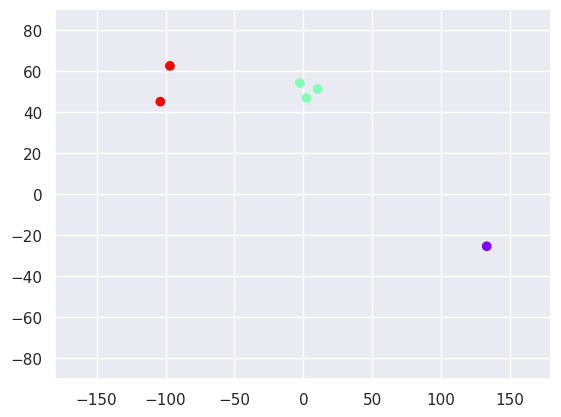

In [13]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show


#Clustering using the language

In [15]:
data_mapped = data.copy()
#Mapping the languages to numbers
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [27]:
x = data_mapped.iloc[:,3:4] #keeping all rows, but only the last column
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [35]:
kmeans = KMeans(2) #The number of clusters
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [36]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 1, 0, 1], dtype=int32)

In [37]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters


,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

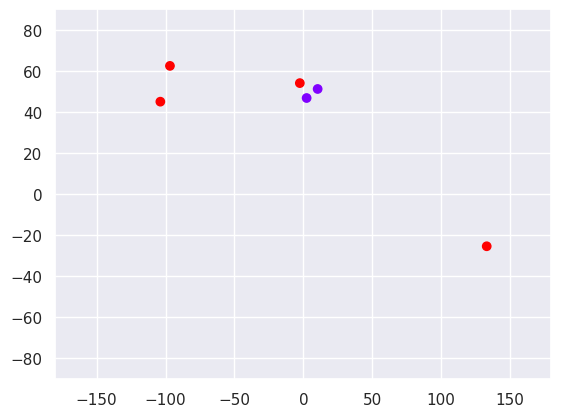

In [38]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

#WCSS using sklearn

In [39]:
kmeans.inertia_ #the wcss value

0.5

In [46]:
wcss =[]

for i in range (1,7): #the possible number of clusters
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_

  wcss.append(wcss_iter)

wcss
#Optimal n of clusters is 2 using the elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-46-104838b59d88>:5: ConvergenceWarning: Number of dis

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

#The Elbow method

Text(0, 0.5, 'WCSS')

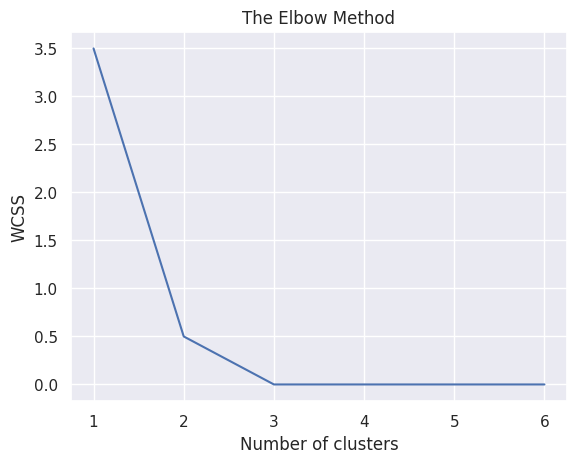

In [41]:
n_clusters = range(1,7)
plt.plot(n_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#Optimal n of clusters using the graph is 3, 2 would be suboptimal